# Physical Injury Modes

```{seealso} Learning Outcomes
- Identify common modes of physical injury in processing, including chemical exposure, heat flux, and overpressure.
- Calculate or estimate injury thresholds, such as the time to onset of 2nd-degree burns from heat flux.
- Distinguish between acute and chronic hazards and their long-term effects on the body (e.g., carcinogens vs. neurotoxins).
```

```{note} Reading
- Foundations of Spiritual and Physical Safety: with Chemical Processes; Chapter 3, Sections 2 (Heat/Overpressure) through the end of Chapter 3

## Heat Flux Hazards

Flames, hot metal surfaces, and other heat sources can cause burns. The heat flux is the amount of heat energy transferred per unit area per unit time. The heat flux is measured in W/m^2.

```{figure} https://github.com/clint-bg/safetyinjc/blob/main/supportfiles/degrees.png?raw=true  
:width: 600px
:alt: Industrial Hygiene Tools
:align: left
:label: Industrial Hygiene Tools
1st, 2nd, and 3rd Degree Burns [Image Reference](https://commons.wikimedia.org/wiki/File:1st,_2nd,_and_3rd_degree_burns.jpg)
```

From Handbook of Chemical Hazards Analysis Procedures (1989), Table 4.2

Heat Radiation Intensity (kW/m^2) |Time for pain (seconds)| Time for 2nd Degree Burn (seconds)
------------------|----------------|-----------------------------------
1                 |115              | 663
2                 |45              | 187
3                 |27              | 92
4                 |18              | 57
5                 |13              | 40
6                 |11              | 30
8                 |7              | 20
10                |5              | 14
12                |4              | 11

[Reference Link](https://nepis.epa.gov/Exe/ZyNET.exe/10003MK5.txt?ZyActionD=ZyDocument&Client=EPA&Index=1986%20Thru%201990&Docs=&Query=%28radiation%29%20OR%20FNAME%3D%2210003MK5.txt%22%20AND%20FNAME%3D%2210003MK5.txt%22&Time=&EndTime=&SearchMethod=1&TocRestrict=n&Toc=&TocEntry=&QField=&QFieldYear=&QFieldMonth=&QFieldDay=&UseQField=&IntQFieldOp=0&ExtQFieldOp=0&XmlQuery=&File=D%3A%5CZYFILES%5CINDEX%20DATA%5C86THRU90%5CTXT%5C00000003%5C10003MK5.txt&User=ANONYMOUS&Password=anonymous&SortMethod=h%7C-&MaximumDocuments=1&FuzzyDegree=0&ImageQuality=r75g8/r75g8/x150y150g16/i425&Display=hpfr&DefSeekPage=x&SearchBack=ZyActionL&Back=ZyActionS&BackDesc=Results%20page&MaximumPages=1&ZyEntry=73) (You may have to click the 'reference link' twice to get it to work.)

:::{admonition} Initial Source
:class: note
The initial source of the above table is Buettner, K, "Effects of Extreme Heat and Cold on Human Skin, II Surface Temperatures, Pain and Heat Conductivity in Experiments with Radiant Heat," Journal of Applied Physiology, 1951, 3, 703.
:::

In [6]:
import pandas as pd
data = {'Radiation (kW/m2)':[1,2,3,4,5,6,8,10,12], 
        'Pain time (sec)':[115,45,27,18,13,11,7,5,4], 
        '2nd Degree Time (sec)':[663, 187,92,57,40,30,20,14,11]}
df = pd.DataFrame(data)

[DESR 6055.09](https://www.denix.osd.mil/ddes/denix-files/sites/32/2021/08/DESR-6055.09-Edition1.pdf) is the handbook for the Department of Defense and gives the following relationship for heat flux (q, kW/m2) and time,t, before a 2nd degree burn:

$$
t = 200 \cdot q^{-1.46}
$$

In [7]:
#Causitive variable from Probit correlations from death from burning
import numpy as np
time = np.linspace(5, 700, 1000)
def Q2(t):
    return (t/200)**(-1/1.46)

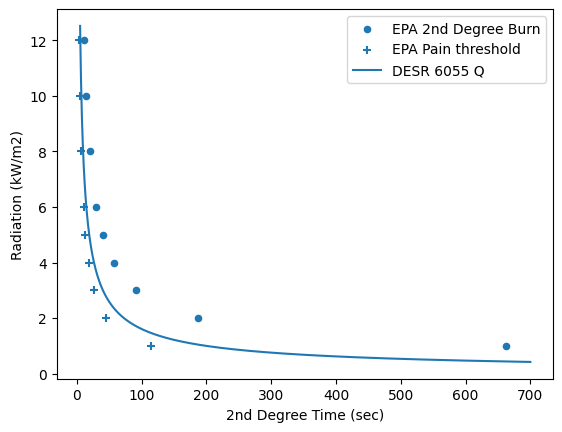

In [8]:
import matplotlib.pyplot as plt
df.plot(x='2nd Degree Time (sec)', y='Radiation (kW/m2)', kind = 'scatter', label='EPA 2nd Degree Burn')
plt.scatter(df['Pain time (sec)'], df['Radiation (kW/m2)'], marker = '+', label = 'EPA Pain threshold')
plt.plot(time, Q2(time), label = 'DESR 6055 Q')
plt.legend(); plt.show()

The above plot shows that the relationship used for the military (DESR 6055) is conservative relative to the EPA's Handbook of Chemical Hazards Analysis Procedures. Considert that in full sun, the approximate radiation is 1 kW/m2. Would it really take 660 seconds (11 minutes) to get a sunburn that blisters? No, it would take longer indicating that both relationships are conservative.

#### Estimating thermal flux from a fire

The radiation from a fire or fireball descreases with the square of the distance from the fire. The heat flux is given by:

$$
q = \frac{P}{4 \pi r^2}
$$

where $P$ is the power of the fire in watts and $r$ is the distance from the fire in meters.

Thus, if a fire has a power of 1 MW and you are 10 meters away, the heat flux is:

'Your answer here'

How long would you have before a 2nd degree burn?

## Overpressure Hazards

The below blast waveform is from a detonation where a mass of explosive material is rapidly converted to gas, creating a high-pressure wave that propagates outward. The peak overpressure ($P_0$) and the duration of the positive phase ($t_d$) depend on factors such as the type and amount of explosive, the distance from the explosion, and the surrounding environment.

Other explosions (bursting of a vessel, BLEVE, etc.) may have different blast wave characteristics where the overpressure rises more slowly and the duration is longer.

```{figure} https://github.com/clint-bg/safetyinjc/blob/main/supportfiles/OverpressurePlot.png?raw=trueg
:width: 500px
:alt: Blast Wave Diagram
:align: left
:label: Blast Wave Diagram
Blast Wave Overpressure vs. Time (Friedlander Waveform). Generated with Gemini.
```

Friedlander waveforms are commonly used to represent blast waves from explosions. The overpressure (the pressure above atmospheric pressure) can cause physical injuries, particularly to the lungs and eardrums.

$$
P(t) = P_0 \left(1 - \frac{t}{t_d}\right) e^{-\frac{t}{t_d}}
$$

- $>$0.4 psig: limited minor structural damage
- 0.4-1.0 psig: window breakage to partial demolition of houses
- 1-5 psig: significant damage to buildings to nearly complete destruction of houses (think about the total pressure on a 10 ft x 10 ft wall)
- 2 psig: Threshold for ear drum rupture
- 10 psig: Threshold for lung and traumatic brain injury
- 35 psig: Threshold for fatal injuries

In [10]:
#Example calculation using the Friedlander waveform:
import numpy as np
Po = 10  # Peak overpressure in psig
td = 0.1  # Duration of positive phase in seconds  
P_t = lambda t: Po * (1 - t/td) * np.exp(-t/td)
P_t(0.05), P_t(0.1), P_t(0.2), P_t(.6)  # Overpressure at t=0.05s, 0.1s, and 0.2s

(3.032653298563167, 0.0, -1.353352832366127, -0.12393760883331802)

## Noise

Sound pressure level (SPL) is used as an intensity measure. The lowest SPL that can be heard by the human ear is near 2E-5 Pa. Thus in the below equation $I_o$ is 2E-5 Pa.

$$
\text{dB} = 10 \log_{10} \left( \frac{I}{I_o} \right)
$$

where $P$ is the sound pressure and $I$ is the intensity.

See "Permissible Noise Exposures," [https://www.osha.gov/laws-regs/regulations/standardnumber/1910/1910.95] (https://www.osha.gov/laws-regs/regulations/standardnumber/1910/1910.95) where you can use the combination rule of $\sum \frac{D_i}{\text{MTA}_i}>1?$ to determine if the worker is overexposed, where $D_i$ is the duration at the given dB sound level and MTA is the maximum time allowed at that level.

Industrial hygienists help protect workers from over exposure: [](#industrialhygienists).

## Acute vs. Chronic

Some injuries are acute\index{acute}, or of short duration, and others are chronic\index{chronic} and last years. Similarly, some toxins\index{toxin} act over a short time and others are chronic and can change the genetic instructions our bodies use (mutagens)\index{mutagen}. Other chemicals can cause cancer (like asbestos causing malignant mesothelioma). Some toxins can cause birth defects and others damage the reproductive system\index{reproductive system} (such as some heavy metals). Some acute toxins can directly target different organs in the body: neurotoxins (nervous system), hepatotoxicants (liver), nephrotoxicants (kidneys), pulmonotoxicants (lungs), or hemotoxicants (blood).

## Elimination of Toxins

Our bodies have natural mechanisms to eliminate toxins. The liver metabolizes many toxins into less harmful substances that can be excreted in the urine or feces. The liver can use enzymes such as cytochrome P450 (CYP450) to oxidize toxins, making them more water-soluble. It can use other mechanisms such as conjugation (adding another chemical group to the toxin) to make it easier to eliminate. Or enzymes can hydrolyze toxins into less harmful substances.

The kidneys filter the blood to remove waste products and toxins, which are then excreted in the urine. The lungs can expel volatile toxins through exhalation. The skin can also eliminate some toxins through sweat.

<br>
<br>
<br>
<br>
<br>
<br>


<br>
<br>
<br>
<br>
<br>
<br>






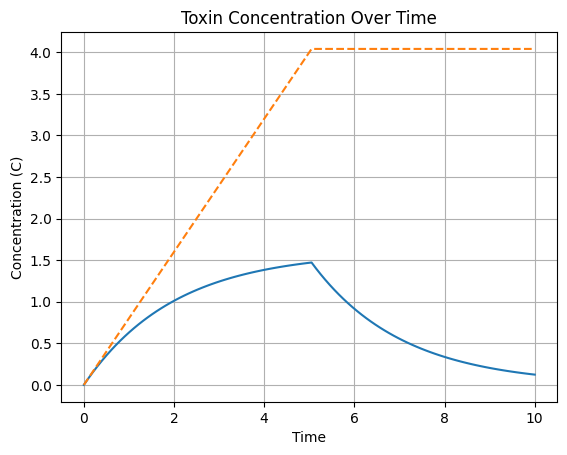

In [30]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters
ti = np.linspace(0, 10, 100)
kp = 0.5
V = 5
C0 = 0  # Initial concentration in blood

# Define Dose D(t) as a function of time
def get_D(t):
    # If time is in the last 50 time points, dose is 0
    if t > ti[len(ti)-50]:
        return 0
    return 4

# Differential Equation: dC/dt = Dose/V - kp*C
def model(C, t):
    dCdt = get_D(t)/V - kp*C
    return dCdt

def model2(C, t):
    dCdt = get_D(t)/V
    return dCdt

# Solve ODE
C = odeint(model, C0, ti)
CnK = odeint(model2, C0, ti)

# Plotting the results
plt.plot(ti, C, label='Toxin Concentration')
plt.plot(ti, CnK, label='Toxin Concentration, no kidney elimination', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Concentration (C)')
plt.title('Toxin Concentration Over Time')
plt.grid(True)
plt.show()

## Process Injuries

In addition to the above injury modes, there are other physical injury modes common in processing industries:
- Moving equipment, machinery, and vehicles
- Falls from heights
- Confined spaces
- Electrical hazards 
- etc. 

See ["What Went Wrong" by Kletz](https://lib.byu.edu/search/byu/record/cat.2549689.item.31197217210910)

## Common Injury Frequencies

|Injury Mode|Likelihood (yr−1)|Ref.|
|---|---|---|
|Driving fatality|0.022|iihs.org|
|Table saw injury|0.003|see text|
|Total OSHA recordable injuries|0.01|bls.gov¹|
|"Work-related slip, trips, and falls"|0.002|bls.govᵃ|
|Work-related fatalities|2.0×10−5|bls.govᵃ|
|Chemical manufacturing related fatalities|2.3×10−5|bls.govᵃ and statista.com²|

```{warning} Action Items
1. Estimate the heat flux from a burning burst natural gas pipeline (shown here: https://www.youtube.com/watch?v=EverTT2D0NM). Estimate the heat flux at a distance of 50 feet from such a scenario. Assume a flow of natural gas of 0.25 kg per second.
2. Pick a needed chemical that is used in the plastics or rubber industry. Find and read a toxicology report on its effects on the body and summarized what you learned.
3. Pick a chemical that is a toxin and review the literature to determine teh pathway or process by which the body removes that specific chemical.
4. Review the "Green Beans Canning Procedure"[](#greenbeans) and detail three specific potential physical injury modes (e.g., thermal, overpressure, or blunt force) that could occur during this home process.
5. Read, watch a video, or otherwise learn about an incident as described by the US Chemical Safety Board (CSB) as detailed at csb.gov. Document some of the details of the event and what should happen in the future to prevent a similar accident.
6. Calculate, analytically, the first time when the concentration of a toxin in the blood is half the maximum concentration (without a kidney present), assuming first-order elimination by the kidneys. Use a kidney elimination rate constant of 0.5 hr^-1 with a dose of 4 mg/hr for 2 hours.
```